In [1]:
from qiskit import transpile
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.test.mock import FakeMumbai
from qiskit.visualization import timeline_drawer
from qiskit_research.utils.dynamical_decoupling import get_timing

In [2]:
backend = FakeMumbai()

In [3]:
durs = get_timing(backend)
#print(durs)

In [4]:
from qiskit_research.utils.dynamical_decoupling import get_dd_sequence

In [5]:
my_seq = get_dd_sequence('XY4pm')
print(my_seq)

[Instruction(name='xp', num_qubits=1, num_clbits=0, params=[]), Instruction(name='yp', num_qubits=1, num_clbits=0, params=[]), Instruction(name='xm', num_qubits=1, num_clbits=0, params=[]), Instruction(name='ym', num_qubits=1, num_clbits=0, params=[])]


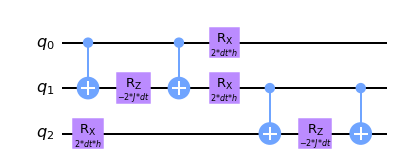

In [6]:
# Latex-like symbols only supported by current versions of my PR 6899 (in template optimization)
JJ = Parameter('$J$') # exchange coupling strength
hh = Parameter('$h$') # transverse magnetic field
dt = Parameter('$dt$') # Trotter step size
TT = Parameter('$T$') # total time

# use non-Latex-like Parameters when going off older commit mods-for-mzm-phase
# JJ = Parameter('J') # exchange coupling strength
# hh = Parameter('h') # transverse magnetic field
# dt = Parameter('dt') # Trotter step size
# TT = Parameter('T') # total time

qc = QuantumCircuit(3)
qc.cx(0, 1)
qc.rz(-2*JJ*dt, 1)
qc.cx(0, 1)
qc.rx(2*hh*dt, [0, 1, 2])
qc.cx(1, 2)
qc.rz(-2*JJ*dt, 2)
qc.cx(1, 2)
qc.draw(output='mpl')

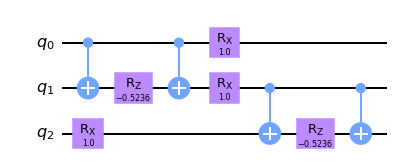

In [7]:
param_bind = {JJ: 0.5236, hh: 1, dt: 0.5}
qc.bind_parameters(param_bind).draw(output='mpl')

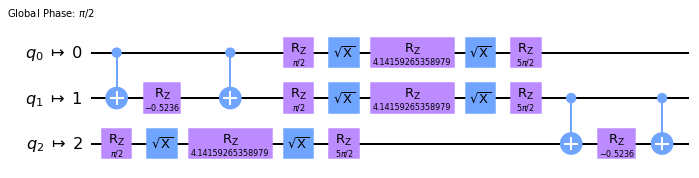

In [8]:
qc_t = transpile(qc.bind_parameters(param_bind), backend)
qc_t.draw(output='mpl', idle_wires=False)

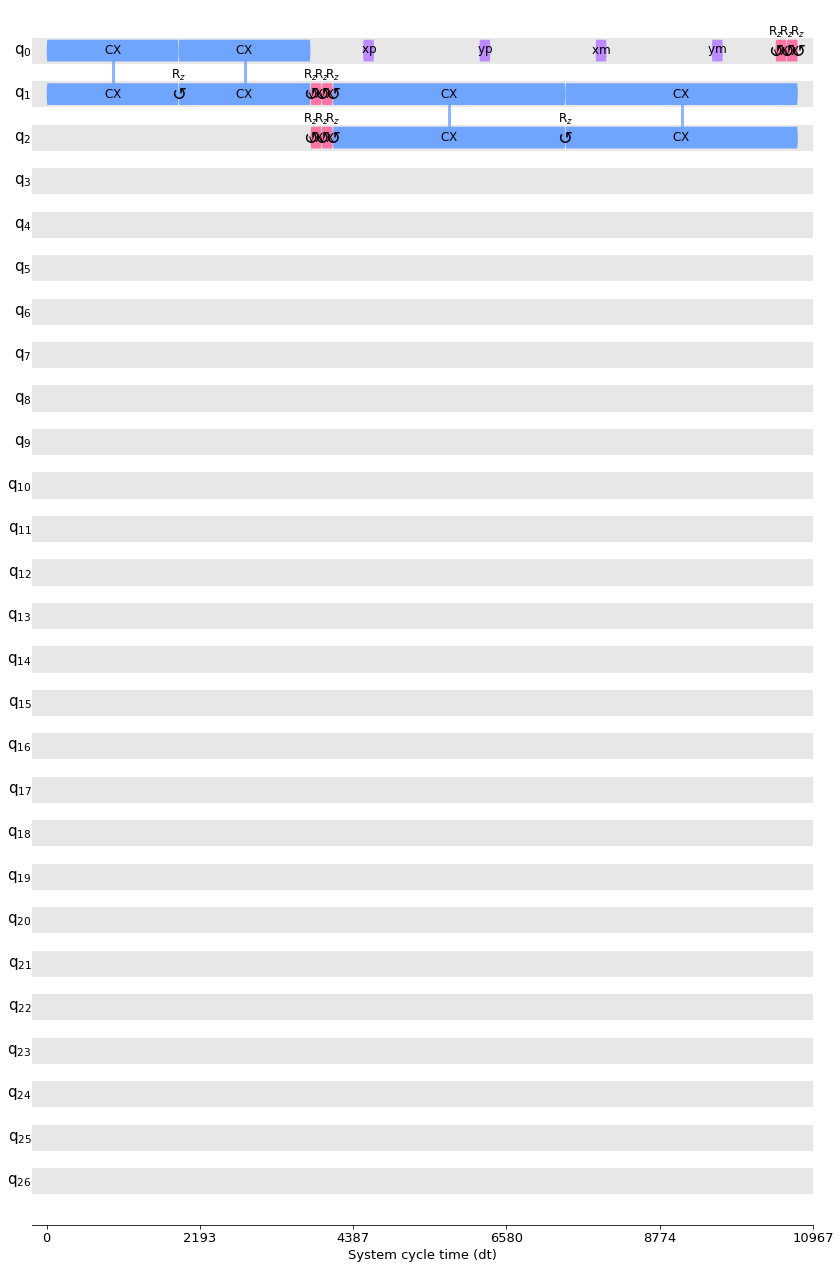

In [9]:
from qiskit_research.utils.dynamical_decoupling import add_dd_sequence
my_dd_circ = add_dd_sequence(qc_t, backend, 'XY4pm', 'alap')
timeline_drawer(my_dd_circ)

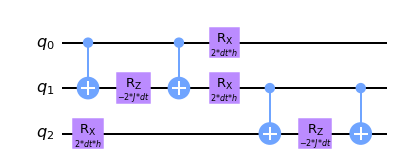

In [10]:
qc.draw(output='mpl')

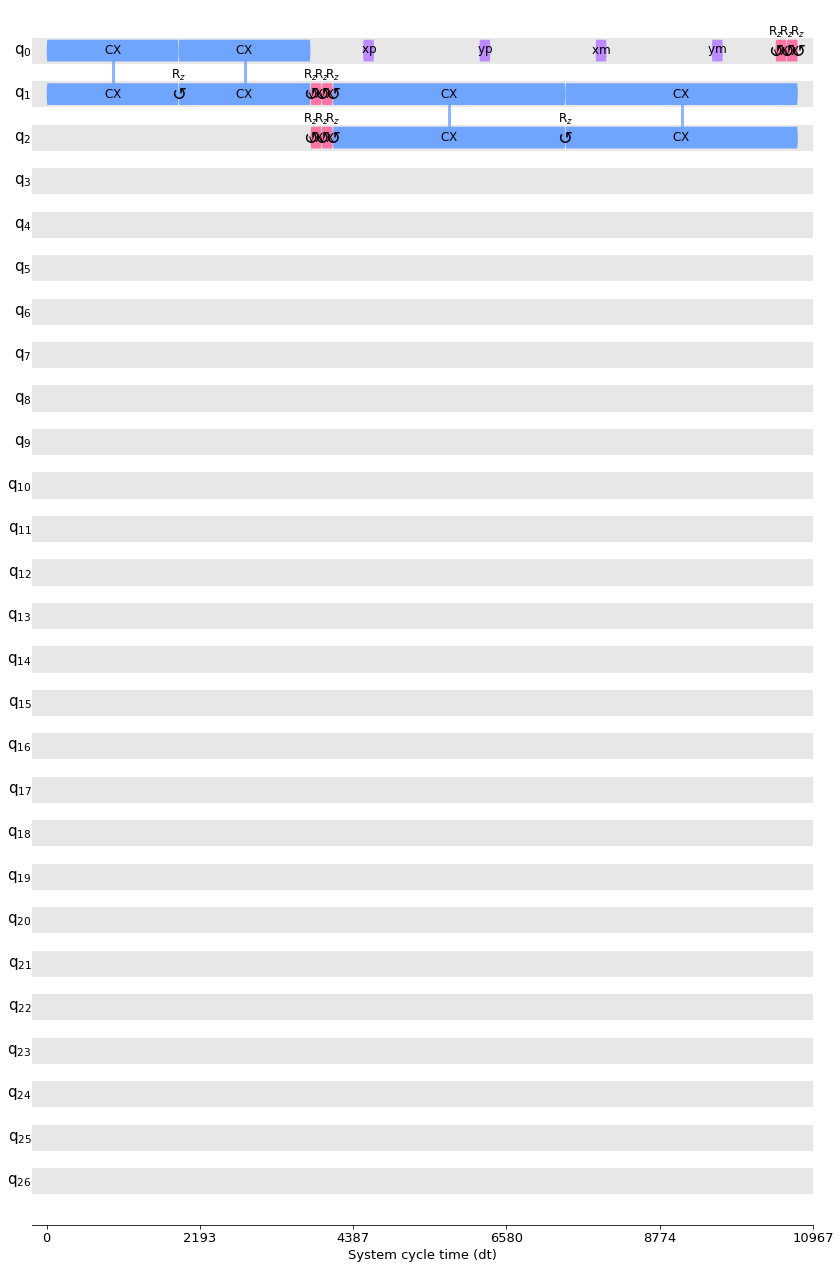

In [11]:
from qiskit_research.utils.dynamical_decoupling import add_dd_calibrations
timeline_drawer(add_dd_calibrations(qc_t, backend, 'XY4pm', sched_method='alap'))

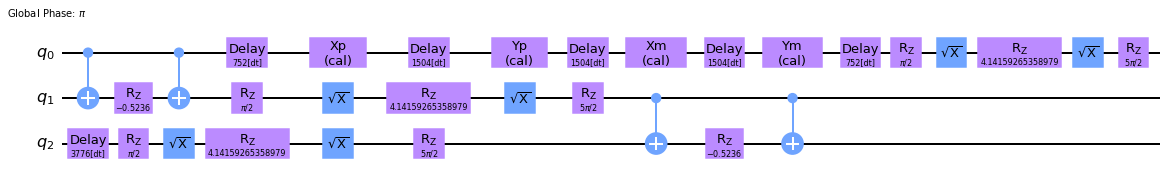

In [12]:
add_dd_calibrations(qc_t, backend, 'XY4pm', sched_method='alap').draw(output='mpl', idle_wires=False)

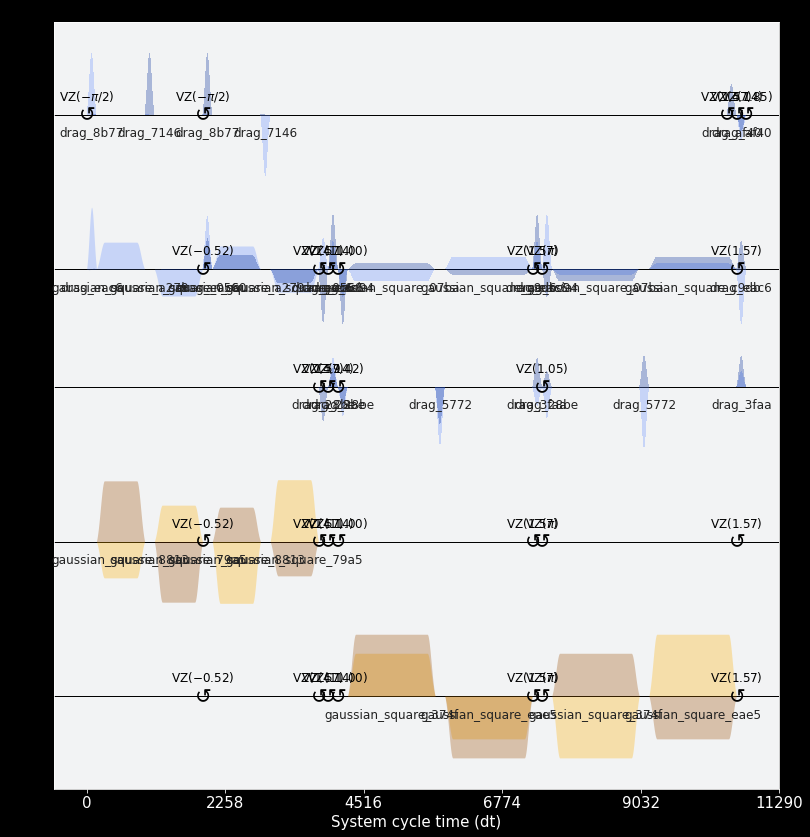

In [13]:
from qiskit import schedule
import matplotlib.pyplot as plt
plt.style.use('dark_background')
schedule(qc_t, backend).draw()

In [14]:
schedule(qc_t, backend).instructions

((0, ShiftPhase(1.5707963267948966, DriveChannel(0))),
 (0, ShiftPhase(1.5707963267948966, ControlChannel(1))),
 (0,
  Play(Drag(duration=160, amp=(-3.28362048587191e-17-0.17875197366609946j), sigma=40, beta=-0.42256441839590886, name='drag_8b77'), DriveChannel(0), name='drag_8b77')),
 (0,
  Play(Drag(duration=160, amp=(0.09205175305628462+0.0003249585706052798j), sigma=40, beta=-0.811679255809397, name='drag_eac6'), DriveChannel(1), name='drag_eac6')),
 (160,
  Play(GaussianSquare(duration=784, amp=(0.040080659815308506+0.0006695939025818598j), sigma=64, width=528, name='gaussian_square_a279'), DriveChannel(1), name='gaussian_square_a279')),
 (160,
  Play(GaussianSquare(duration=784, amp=(-0.11761455898052146+0.1962067988385452j), sigma=64, width=528, name='gaussian_square_8813'), ControlChannel(0), name='gaussian_square_8813')),
 (944,
  Play(Drag(duration=160, amp=(0.17875197366609946+0j), sigma=40, beta=-0.42256441839590886, name='drag_7146'), DriveChannel(0), name='drag_7146')),
 

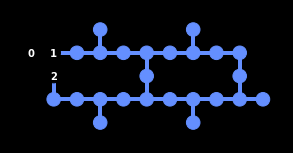

In [15]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_t, backend)

In [16]:
backend.configuration().coupling_map

[[0, 1],
 [1, 0],
 [1, 2],
 [1, 4],
 [2, 1],
 [2, 3],
 [3, 2],
 [3, 5],
 [4, 1],
 [4, 7],
 [5, 3],
 [5, 8],
 [6, 7],
 [7, 4],
 [7, 6],
 [7, 10],
 [8, 5],
 [8, 9],
 [8, 11],
 [9, 8],
 [10, 7],
 [10, 12],
 [11, 8],
 [11, 14],
 [12, 10],
 [12, 13],
 [12, 15],
 [13, 12],
 [13, 14],
 [14, 11],
 [14, 13],
 [14, 16],
 [15, 12],
 [15, 18],
 [16, 14],
 [16, 19],
 [17, 18],
 [18, 15],
 [18, 17],
 [18, 21],
 [19, 16],
 [19, 20],
 [19, 22],
 [20, 19],
 [21, 18],
 [21, 23],
 [22, 19],
 [22, 25],
 [23, 21],
 [23, 24],
 [24, 23],
 [24, 25],
 [25, 22],
 [25, 24],
 [25, 26],
 [26, 25]]